In [1]:
import numpy as np
import os

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import astropy

import qp
%config Completer.use_jedi = False

In [2]:
ens = qp.read('qp_test_ensemble.hdf5')
ens_red = ens[np.arange(10)]
z = ens.metadata()['xvals'][0]
P = ens_red.objdata()['yvals']
Ntot = len(P)

First possible usage : A trivial conversion from gaussian mixmod to same voigt bases (so gamma set to 0)

In [3]:
# Convert to a gaussian mixture using 301 sample points and ncomps components
ncomps = 3
xvals = np.linspace(0, 3.0, 301)
ens_m = qp.convert(ens_red, 'mixmod', xvals=xvals, ncomps=ncomps)
ens_voigt = qp.convert(ens_m, 'voigt')

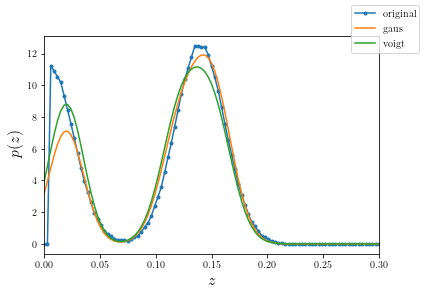

In [11]:
key = 1
axes_m = ens_red.plot(key, xlim=(0, 0.3), label="original", marker='.')
_ = ens_m.plot(key, axes=axes_m, label="gaus")
_ = ens_voigt.plot(key, axes=axes_m, label="voigt")
leg_m = axes_m.figure.legend()

2 remarks :
- the mixmod fit seems a bit unstable : https://github.com/LSSTDESC/qp/issues/28
- the truncation at z=0 is quite interesting; this could be typical of a faint star, for which the star/galaxy separation fails but the colours still allow for a non zero redshift solution to the photoz estimation. The fact that the representaiton has a second mode distinctly distinct from 0 compared to the original pdf is a potentially serious concern

The next stage would be to convert the original xy representation into a sparse one, based on the orthogonal matching pursuit scheme and the Voigt basis implemented in sparse_rep 

In [12]:
ens_sparse = qp.convert(ens_red, class_name='sparse')

Total Galaxies =  10
dx =  0.0007357859336163683
Nmu, Nsig, Nv =  [ 300 , 50 , 3 ]
Total bases in dictionary 45000
Nsparse (number of bases) =  20
Creating Dictionary...
Creating Sparse representation...
done


In [13]:
ens_sparse[9]

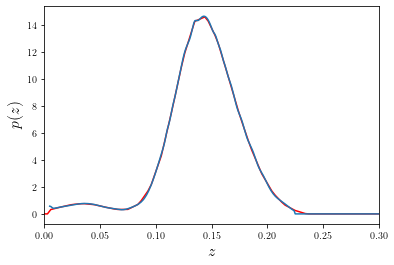

In [14]:
x = np.linspace(0.005,0.3,300)
y = ens_sparse.pdf(x)[9]
axes_m = ens_red.plot(9, xlim=(0, 0.3), label="original", color='r')
axes_m.plot(x,y)

In [15]:
ens_sparse.plot_native(ens_sparse[key],axes=axes_m, label="sparse",marker='.',color='b',linewidth=0)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

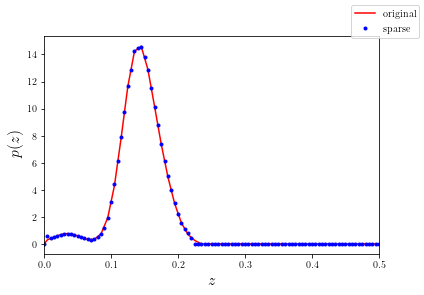

In [16]:
key = 9
axes_m = ens_red.plot(key, xlim=(0, 0.5), label="original", color='r')
_ = ens_sparse.plot(key,axes=axes_m, label="sparse",marker='.',color='b',linewidth=0)
leg_m = axes_m.figure.legend()

So this fails a bit cryptically to me.... 
Another natural way to proceed would be to inherit for the interp class from qp, as in essence the sparse representation encodes an 'xy' representation into a sparse representation.